Project ID - #CC69853

Project Title - Customer Segmentation with K-Means Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/shopping_trends_updated.csv")
df_raw = pd.read_csv("/shopping_trends_updated.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
print(df.shape)

(3900, 18)


In [ ]:
null_values = df.isnull().sum()
print(null_values)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
#Loop through categorical columns for the count of unique values
unique_value_counts = {}

for column in df.select_dtypes(include=['object']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Gender': 2, 'Item Purchased': 25, 'Category': 4, 'Location': 50, 'Size': 4, 'Color': 25, 'Season': 4, 'Subscription Status': 2, 'Shipping Type': 6, 'Discount Applied': 2, 'Promo Code Used': 2, 'Payment Method': 6, 'Frequency of Purchases': 7}


In [ ]:
#Loop through numerical columns for the count of unique values
unique_value_counts = {}

for column in df.select_dtypes(include=['int64', 'float']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Customer ID': 3900, 'Age': 53, 'Purchase Amount (USD)': 81, 'Review Rating': 26, 'Previous Purchases': 50}


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [ ]:
df[df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [ ]:
data = df.copy()
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


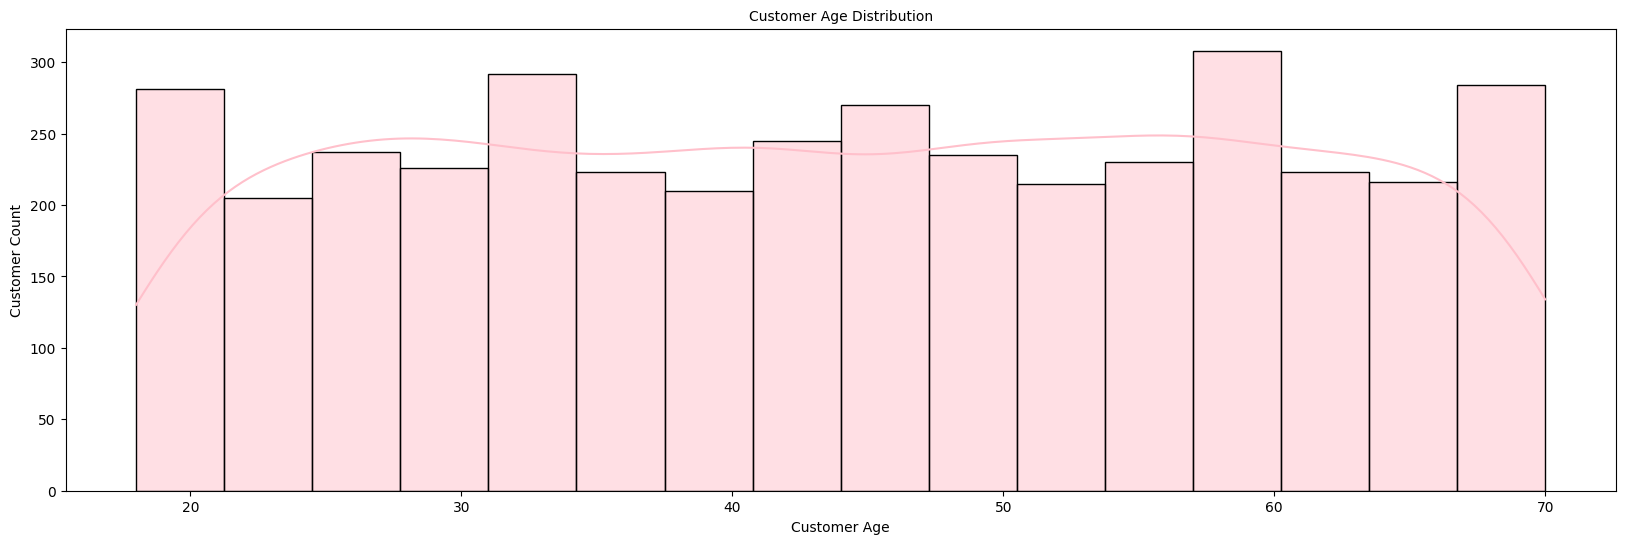

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.histplot(data=data, x='Age', kde=True, color='pink')
plt.title('Customer Age Distribution', size=10)
plt.xlabel('Customer Age')
plt.ylabel('Customer Count')
plt.show()

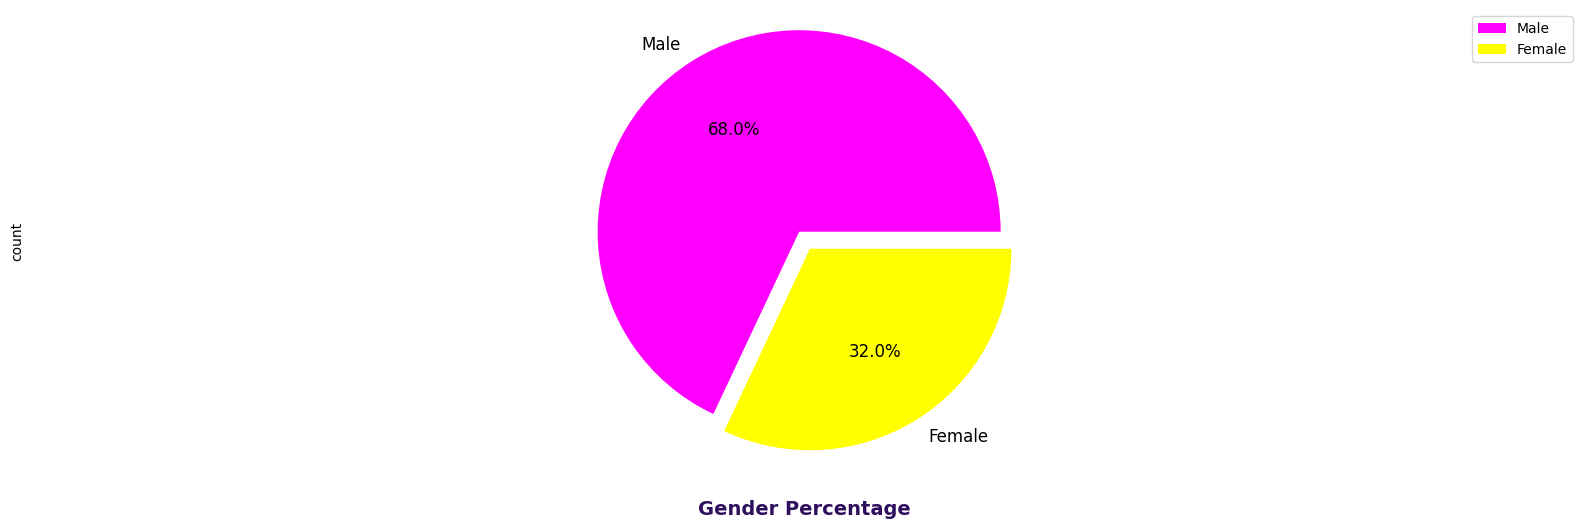

In [ ]:
plt.figure(figsize = (20, 6))

counts = data['Gender'].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, cmap='spring', explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender Percentage', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

#The fact that we have more men than women is due to the data collection process

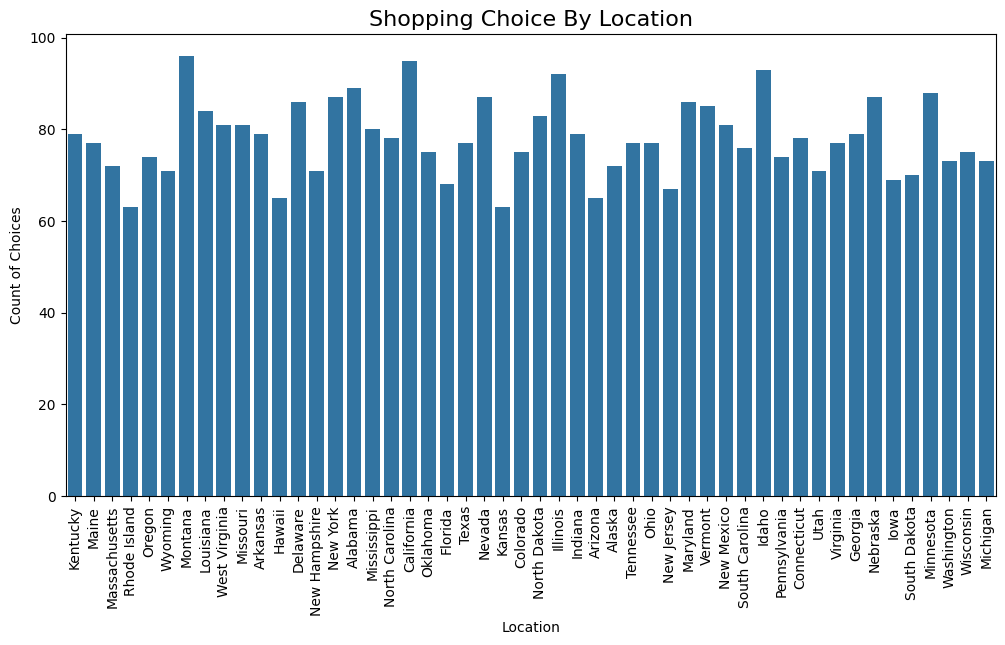

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Location')
plt.title('Shopping Choice By Location', size=16)
plt.xlabel('Location')
plt.ylabel('Count of Choices')
plt.xticks(rotation=90)
plt.show()

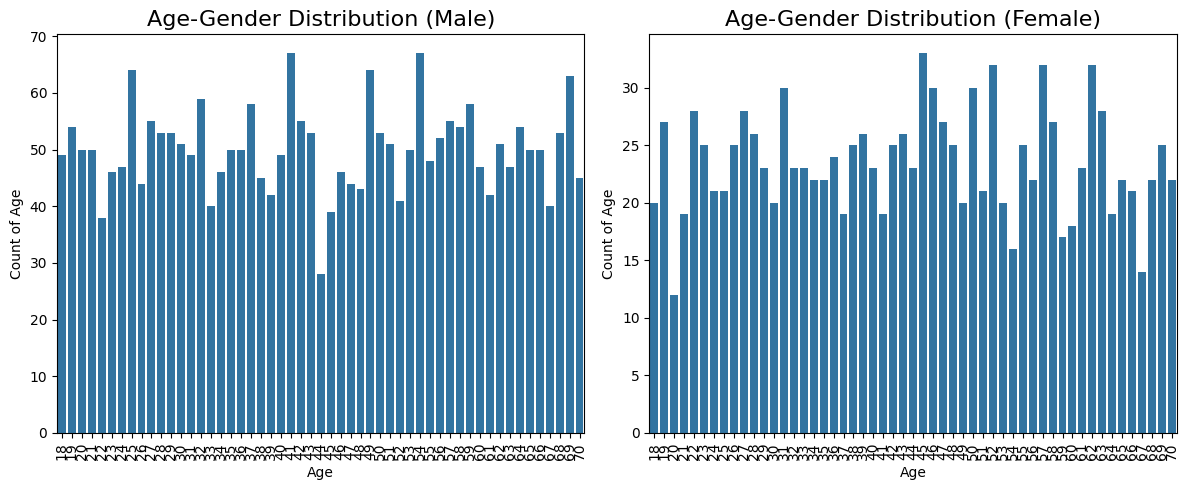

In [ ]:
# Age-gender distribution
filtered_male = data[data['Gender'] == 'Male']
filtered_female = data[data['Gender'] == 'Female']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create the first countplot for male customers
ax1 = sns.countplot(data=filtered_male, x='Age', ax=axes[0])
ax1.set_title('Age-Gender Distribution (Male)', size=16)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count of Age')
ax1.tick_params(axis='x', rotation=90)

# Create the second countplot for female customers
ax2 = sns.countplot(data=filtered_female, x='Age', ax=axes[1])
ax2.set_title('Age-Gender Distribution (Female)', size=16)
ax2.set_xlabel('Age')
ax2.set_ylabel('Count of Age')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

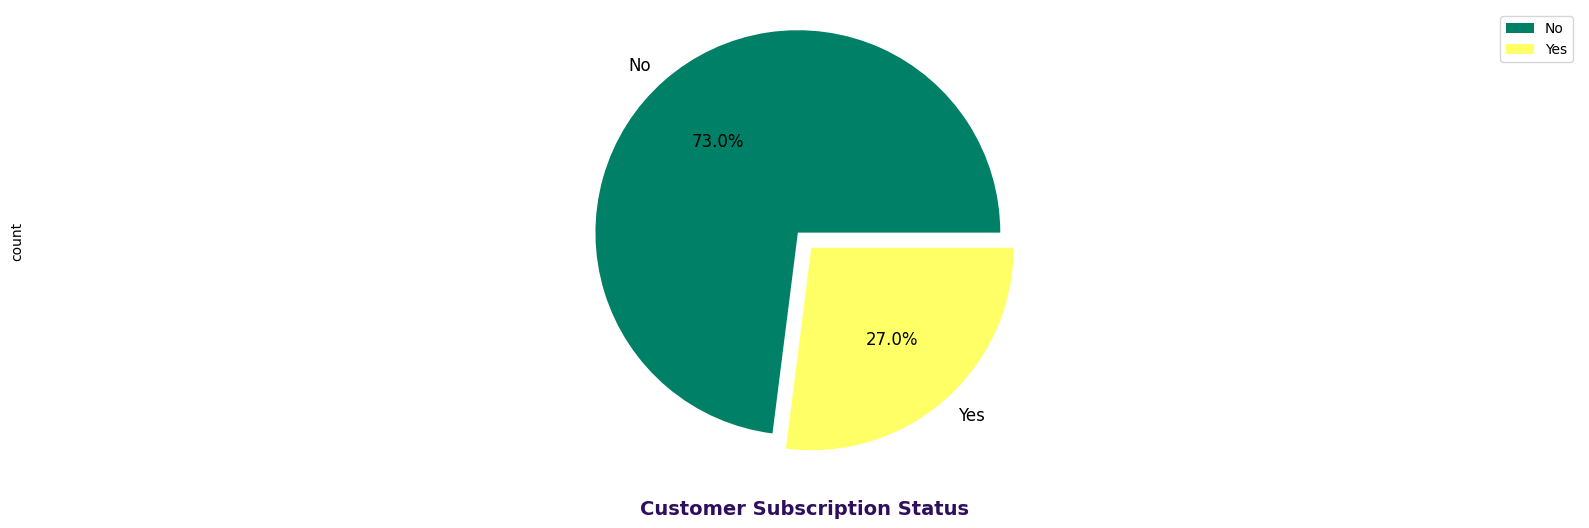

In [ ]:
plt.figure(figsize = (20, 6))

counts = data['Subscription Status'].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, cmap='summer', explode = explode, autopct = '%1.1f%%')
plt.xlabel('Customer Subscription Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

#About 1/3 of our customers signed up for membership

In [ ]:
#Revenue at each location

revenue = data.groupby('Location').agg({'Purchase Amount (USD)':'sum'}).reset_index()

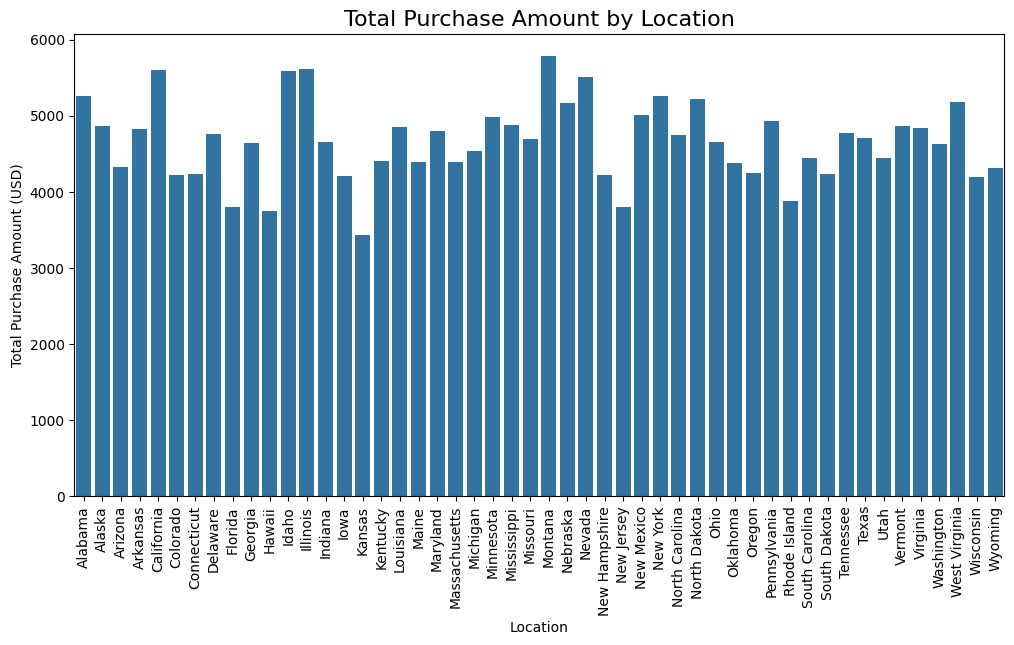

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(data=revenue, x='Location', y='Purchase Amount (USD)')
plt.title('Total Purchase Amount by Location', size=16)
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=90)

plt.show()

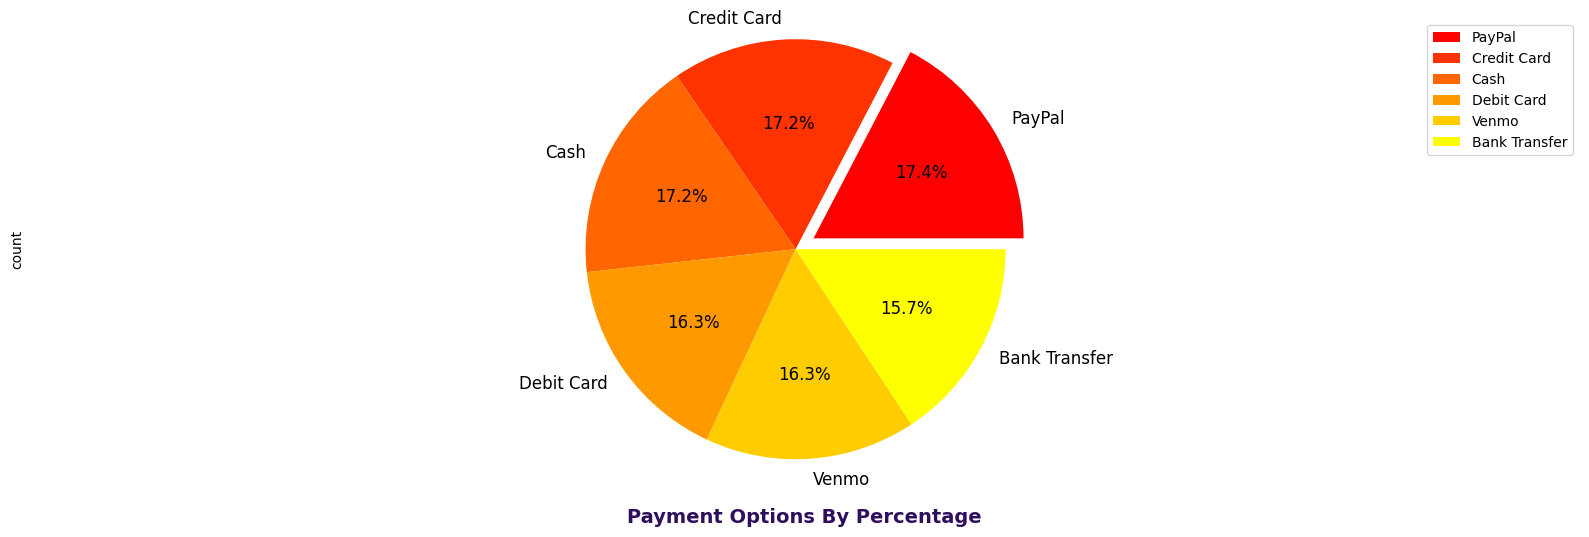

In [ ]:
plt.figure(figsize = (20, 6))

counts = data["Payment Method"].value_counts()
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, cmap = 'autumn', explode = explode, autopct = '%1.1f%%')
plt.xlabel('Payment Options By Percentage', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

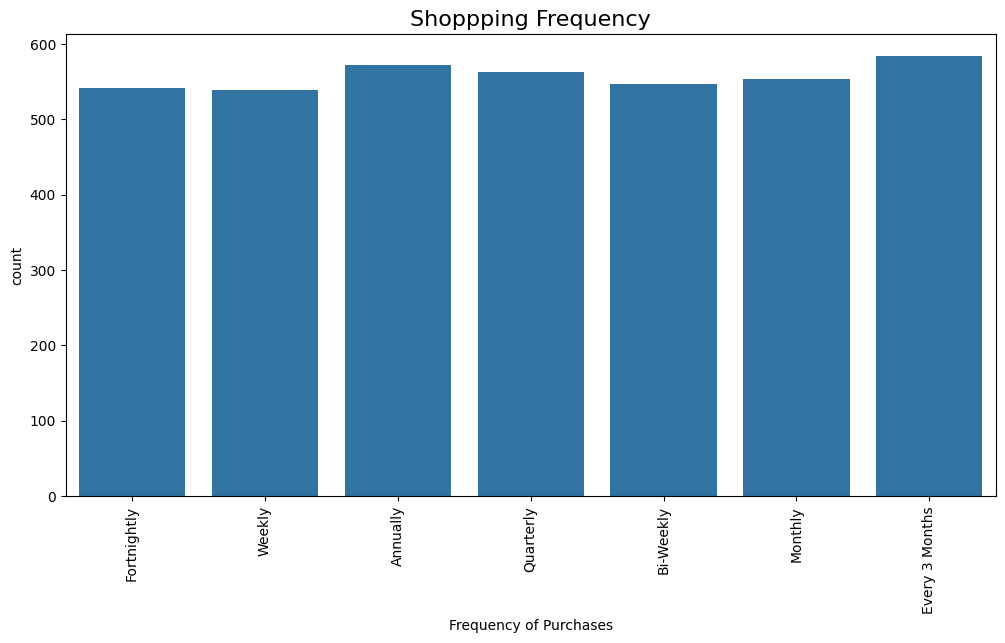

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Frequency of Purchases')
plt.title('Shoppping Frequency', size=16)
plt.xticks(rotation=90)
plt.show()

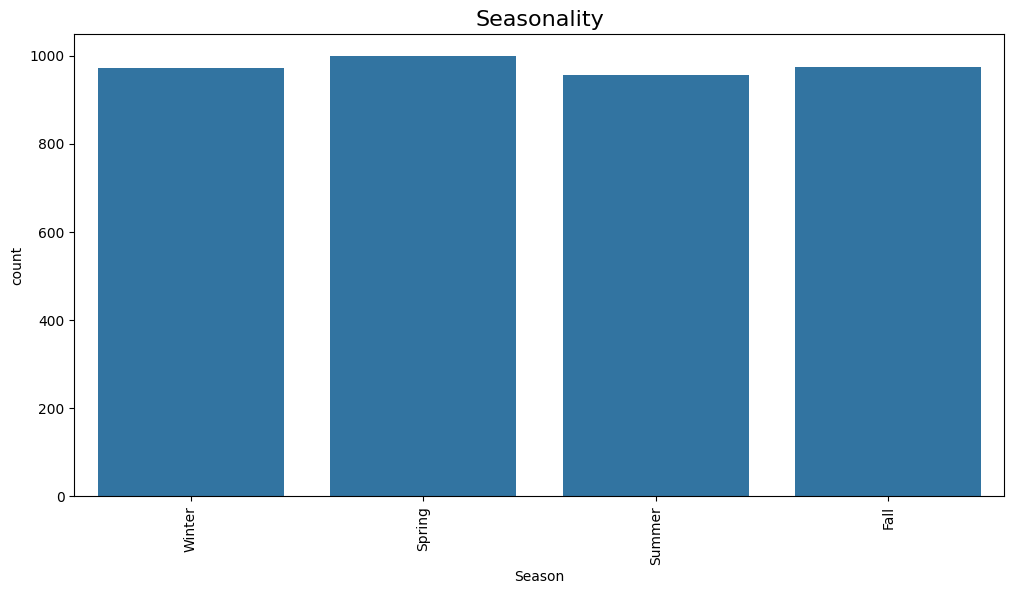

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Season')
plt.title('Seasonality', size=16)
plt.xticks(rotation=90)
plt.show()

#The shopping mall has a fairly stable amount of visitors all year round

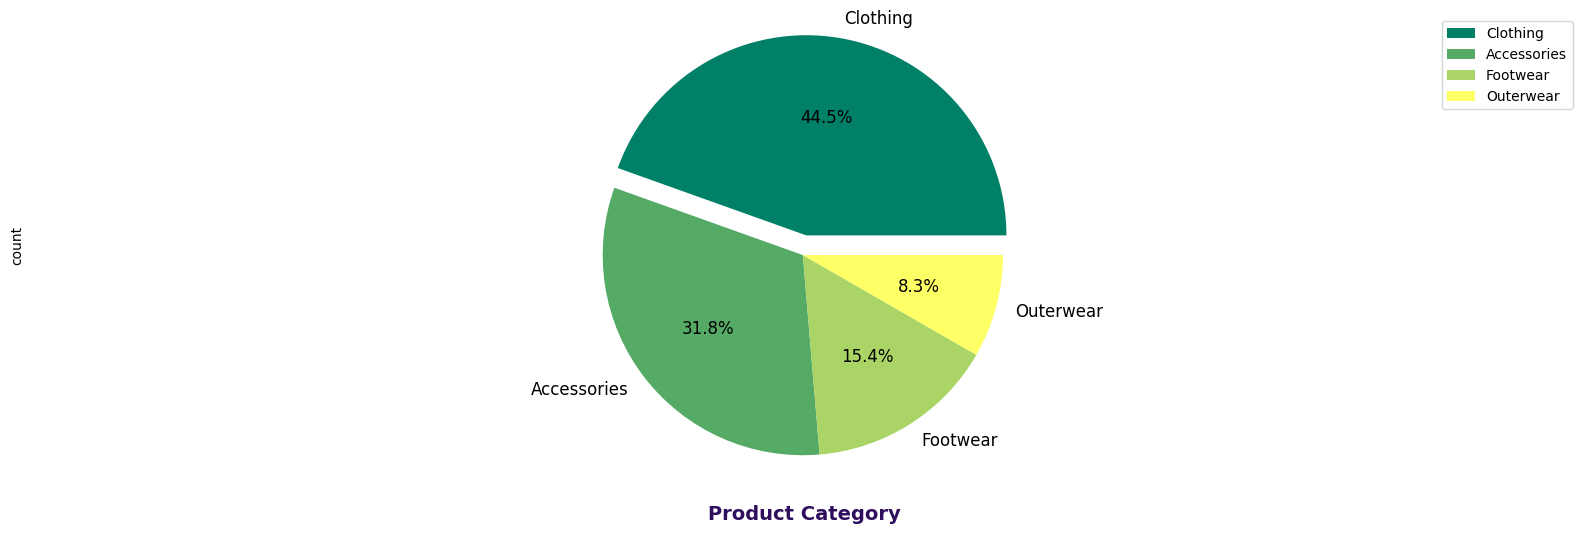

In [ ]:
plt.figure(figsize = (20, 6))

counts = data["Category"].value_counts()
explode = (0.1, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, cmap = 'summer', explode = explode, autopct = '%1.1f%%')
plt.xlabel('Product Category', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

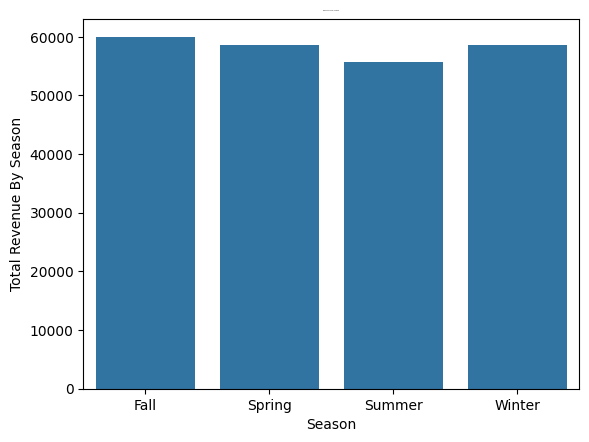

In [ ]:
#Revenue Vs. Seasonality

season_revenue = data.groupby('Season').agg({'Purchase Amount (USD)':'sum'}).reset_index()

sns.barplot(data=season_revenue, x='Season', y='Purchase Amount (USD)')
plt.title('Revenue Each Season', size=-16)
plt.ylabel('Total Revenue By Season')
plt.show()

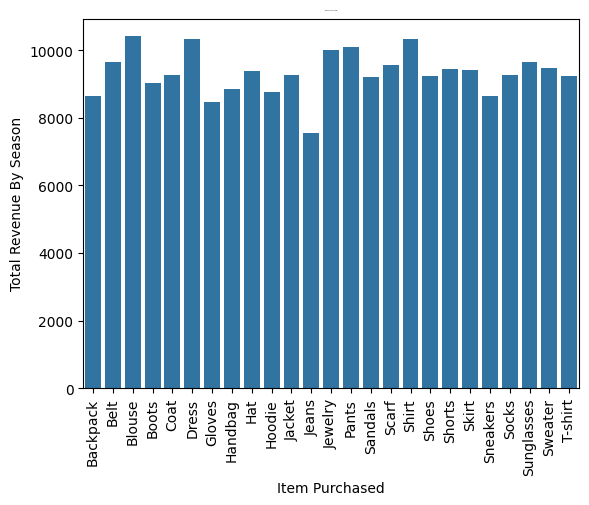

In [ ]:
#Item purchased Vs. USD

Item = data.groupby('Item Purchased').agg({'Purchase Amount (USD)':'sum'}).reset_index()

sns.barplot(data=Item, x='Item Purchased', y='Purchase Amount (USD)')
plt.title('Revenue By Item', size=-16)
plt.ylabel('Total Revenue By Season')
plt.xticks(rotation=90)
plt.show()

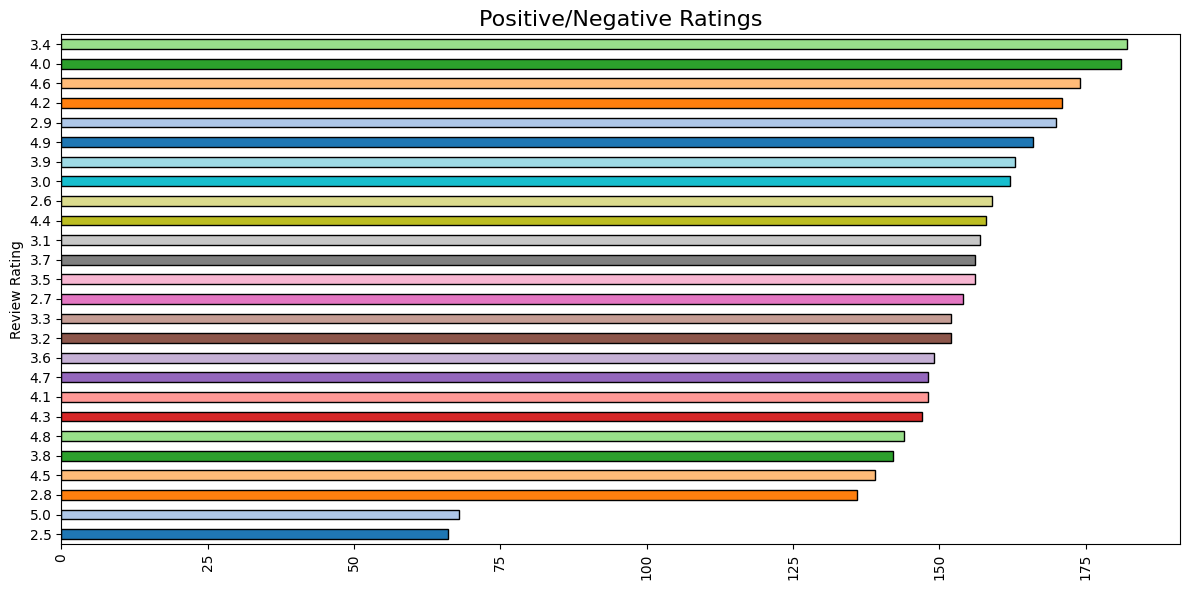

In [ ]:
plt.figure(figsize=(12, 6))
data["Review Rating"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.title('Positive/Negative Ratings', size=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#We have a lot of neutral ratings

In [ ]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

data_processed = df.copy()

categorical_columns = ['Gender', 'Category', 'Shipping Type', 'Subscription Status', 'Frequency of Purchases', 'Promo Code Used', 'Discount Applied', 'Payment Method']

label_encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    data_processed[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder

data_processed

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,1,53,Kentucky,L,Gray,Winter,3.1,1,1,1,1,14,5,3
1,2,19,1,Sweater,1,64,Maine,L,Maroon,Winter,3.1,1,1,1,1,2,1,3
2,3,50,1,Jeans,1,73,Massachusetts,S,Maroon,Spring,3.1,1,2,1,1,23,2,6
3,4,21,1,Sandals,2,90,Rhode Island,M,Maroon,Spring,3.5,1,3,1,1,49,4,6
4,5,45,1,Blouse,1,49,Oregon,M,Turquoise,Spring,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,Hoodie,1,28,Virginia,L,Turquoise,Summer,4.2,0,0,0,0,32,5,6
3896,3897,52,0,Backpack,0,49,Iowa,L,White,Spring,4.5,0,5,0,0,41,0,1
3897,3898,46,0,Belt,0,33,New Jersey,L,Green,Spring,2.9,0,4,0,0,24,5,5
3898,3899,44,0,Shoes,2,77,Minnesota,S,Brown,Summer,3.8,0,1,0,0,24,5,6


In [ ]:
data1 = data_processed[['Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Frequency of Purchases', 'Promo Code Used', 'Discount Applied', 'Previous Purchases']]
data1

,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Shipping Type,Frequency of Purchases,Promo Code Used,Discount Applied,Previous Purchases
0,55,1,1,53,3.1,1,1,3,1,1,14
1,19,1,1,64,3.1,1,1,3,1,1,2
2,50,1,1,73,3.1,1,2,6,1,1,23
3,21,1,2,90,3.5,1,3,6,1,1,49
4,45,1,1,49,2.7,1,2,0,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,1,28,4.2,0,0,6,0,0,32
3896,52,0,0,49,4.5,0,5,1,0,0,41
3897,46,0,0,33,2.9,0,4,5,0,0,24
3898,44,0,2,77,3.8,0,1,6,0,0,24


In [ ]:
data1.corr()

,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Shipping Type,Frequency of Purchases,Promo Code Used,Discount Applied,Previous Purchases
Age,1.000000,0.002763,0.003546,-0.010424,-0.021949,0.006492,-0.010743,0.017406,0.004366,0.004366,0.040445
Gender,0.002763,1.000000,-0.004144,-0.014044,0.008164,0.417197,0.016490,0.012829,0.595823,0.595823,0.035873
Category,0.003546,-0.004144,1.000000,-0.017841,-0.000299,0.011022,-0.009031,0.012190,0.000572,0.000572,-0.015669
Purchase Amount (USD),-0.010424,-0.014044,-0.017841,1.000000,0.030776,-0.006996,-0.024637,-0.017219,-0.017798,-0.017798,0.008063
Review Rating,-0.021949,0.008164,-0.000299,0.030776,1.000000,-0.006368,-0.009787,0.005643,-0.012486,-0.012486,0.004229
Subscription Status,0.006492,0.417197,0.011022,-0.006996,-0.006368,1.000000,0.017142,0.003601,0.700202,0.700202,0.030859
Shipping Type,-0.010743,0.016490,-0.009031,-0.024637,-0.009787,0.017142,1.000000,-0.003976,0.020877,0.020877,-0.013931
Frequency of Purchases,0.017406,0.012829,0.012190,-0.017219,0.005643,0.003601,-0.003976,1.000000,0.010144,0.010144,0.040261
Promo Code Used,0.004366,0.595823,0.000572,-0.017798,-0.012486,0.700202,0.020877,0.010144,1.000000,1.000000,0.023537
Discount Applied,0.004366,0.595823,0.000572,-0.017798,-0.012486,0.700202,0.020877,0.010144,1.000000,1.000000,0.023537


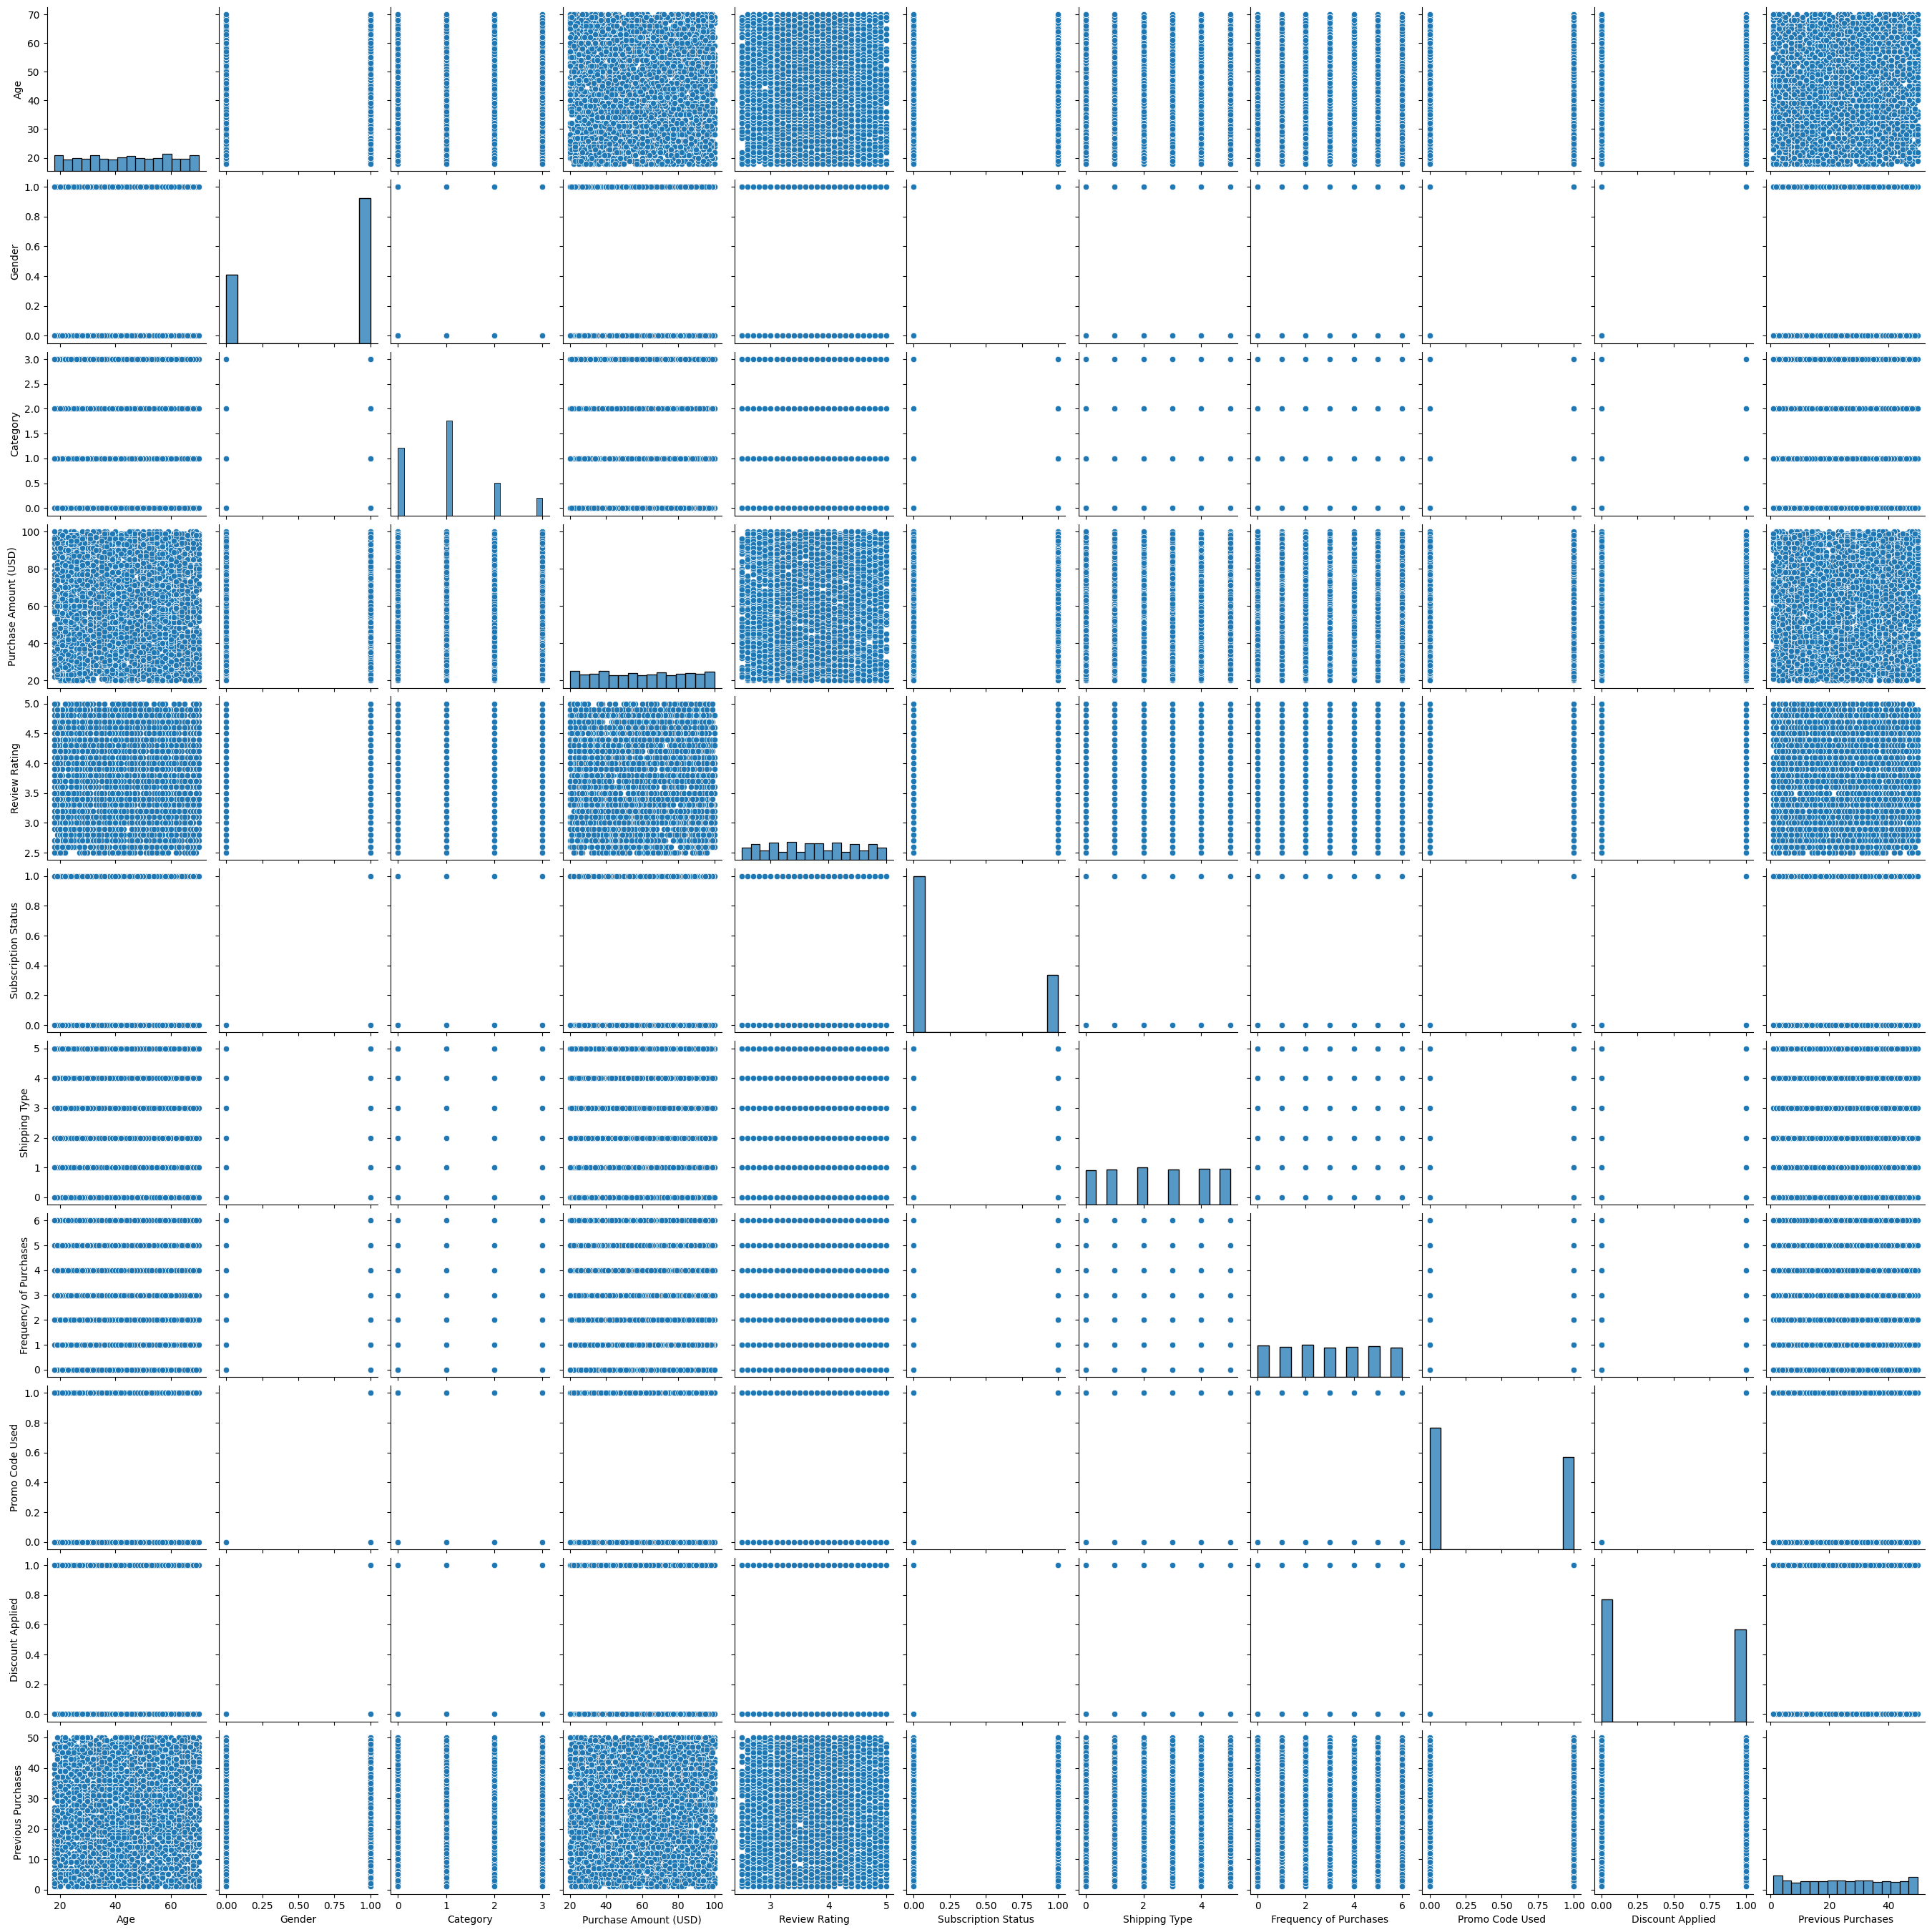

In [ ]:
import seaborn as sns
sns.pairplot(data1)
plt.show()

#Not much relationship among features

In [ ]:
clustering = data1[['Age', 'Promo Code Used', 'Discount Applied', 'Frequency of Purchases']]
clustering

#I want to check if is the factor that may affect rating and the number of time someone visiting our mall
#This could be an indicator showing what part of the business affecting which age group

,Age,Promo Code Used,Discount Applied,Frequency of Purchases
0,55,1,1,3
1,19,1,1,3
2,50,1,1,6
3,21,1,1,6
4,45,1,1,0
...,...,...,...,...
3895,40,0,0,6
3896,52,0,0,1
3897,46,0,0,5
3898,44,0,0,6


In [ ]:
#Scaling the data to be ranged from 1 to 10

clustering = ((clustering - clustering.min()) / (clustering.max() - clustering.min())) * 9 + 1

In [ ]:
clustering.head()

,Age,Promo Code Used,Discount Applied,Frequency of Purchases
0,7.403846,10.0,10.0,5.5
1,1.173077,10.0,10.0,5.5
2,6.538462,10.0,10.0,10.0
3,1.519231,10.0,10.0,10.0
4,5.673077,10.0,10.0,1.0


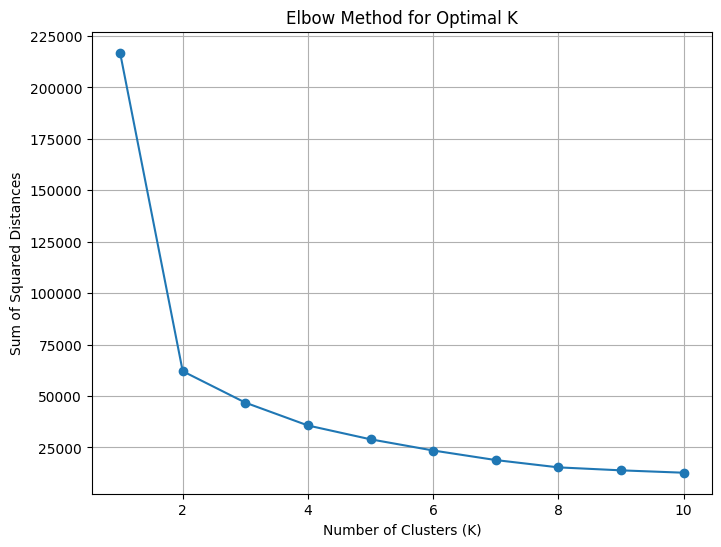

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Create a list to store the sum of squared distances (inertia) for different K values
inertia = []

# Define the range of K values to test
k_values = range(1, 11)

# Fit KMeans for each K and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering)  # Replace 'data' with your dataset
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.grid()
plt.show()

In [ ]:
#Initialize random centroid

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = clustering.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(clustering, 2)
centroids

,0,1
Age,6.192308,2.730769
Promo Code Used,1.000000,1.000000
Discount Applied,1.000000,1.000000
Frequency of Purchases,1.000000,10.000000


In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((clustering - x) **2).sum(axis=1)))
    return distances.idxmin(axis=1)

#return the label for each data point

In [ ]:
labels = get_labels(data, centroids)
labels

0       0
1       1
2       1
3       1
4       0
       ..
3895    1
3896    0
3897    1
3898    1
3899    1
Length: 3900, dtype: int64

In [ ]:
labels.value_counts()

#2040 customers are clustered to C0, and 1860 to C1

0    2132
1    1768
Name: count, dtype: int64

In [ ]:
#Update the centroids

def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

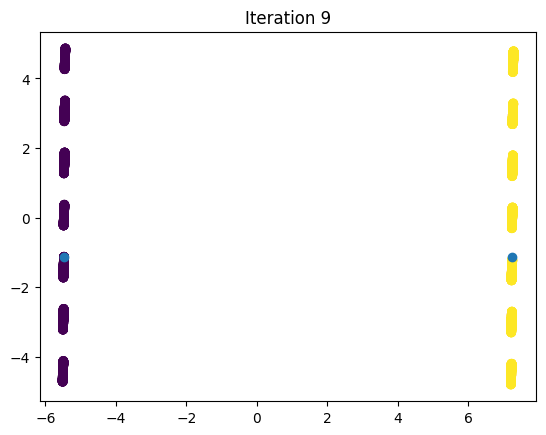

In [ ]:
max_iterations = 100
k = 2

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(clustering, centroids)
    centroids = new_centroids(clustering, labels, k)
    plot_cluster(clustering, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1
Age,4.733834,4.740520
Promo Code Used,1.000000,10.000000
Discount Applied,1.000000,10.000000
Frequency of Purchases,4.338036,4.426554


Overall, this just shows 2 clusters of the same characteristics in 2 different levels. People either use or don't use a promo code or apply discount. The outcome is understandable since earlier in EDA, we barely recognized any outstanding behaviors that fall strongly in a specific group. Everything is fairly normally distributed